In [1]:
import dicom_reader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from matplotlib.colors import ListedColormap
from matplotlib.colors import to_rgba

green_cmap = [[1.0, 1.0, 1.0 ,0]]
green_cmap.append(to_rgba('lime'))
green_cmap = ListedColormap(green_cmap)

blue_cmap = [[1.0, 1.0, 1.0 ,0]]
blue_cmap.append(to_rgba('deepskyblue'))
blue_cmap = ListedColormap(blue_cmap)

red_cmap = [[1.0, 1.0, 1.0 ,0]]
red_cmap.append(to_rgba('red'))
red_cmap = ListedColormap(red_cmap)

In [3]:
# example dicom files
img_dir = f'/home/lang/Data/TCIA/lung/NSCLC_Radio/medical_data/dicom/LUNG1-046/CT/'
sgmt_file = f'/home/lang/Data/TCIA/lung/NSCLC_Radio/medical_data/dicom/LUNG1-046/RTSTRUCT/1-65ea44b4e06ce3a0f2def990b66e2cea.dcm'

In [4]:
img_ds = dicom_reader.DICOMImage(img_dir)
img = img_ds.get_pixel_array()

In [5]:
sgmt_ds = dicom_reader.DICOMStruct(
    sgmt_file,
    origin=img_ds.get_origin(),
    spacing=img_ds.get_spacing(),
    shape=img_ds.get_size()
)

In [6]:
sgmt_ds.get_ROI_names()

['Lung-Right', 'Lung-Left', 'Heart', 'Esophagus', 'Spinal-Cord', 'GTV-1']

In [7]:
sgmt = sgmt_ds.get_pixel_array('GTV-1')

In [8]:
sgmt_bbox = np.zeros(img.shape)
xmin, xmax, ymin, ymax, zmin, zmax = sgmt_ds.get_bbox('GTV-1', 'numpy')
sgmt_bbox[xmin:xmax, ymin:ymax, zmin:zmax] = 1

In [9]:
print(f'{min(np.where(sgmt)[-1])} <= height <= {max(np.where(sgmt)[-1])}')

18 <= height <= 40


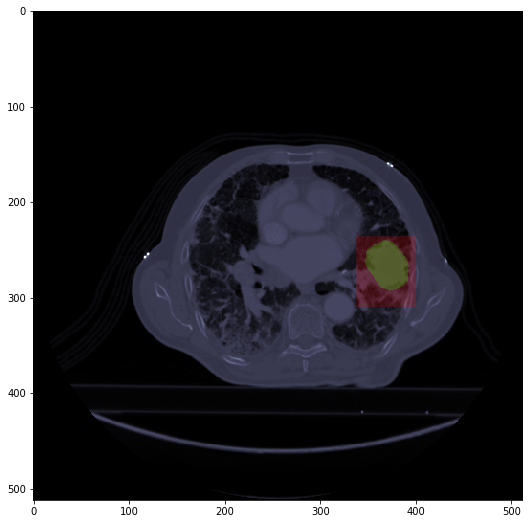

In [10]:
idx = 35

fig = plt.figure(figsize=(16, 9))
plt.imshow(img[:, :, idx], cmap='bone')
plt.imshow(sgmt[:, :, idx], cmap=green_cmap, alpha=0.3)
plt.imshow(sgmt_bbox[:, :, idx], cmap=red_cmap, alpha=0.2)